### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Count missing values per column
missing_data = data.isnull().sum()

# Percentage of missing values
missing_percentage_data = (missing_data / len(data)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage (%)": missing_percentage_data
})
print(missing_summary)

                      Missing Values  Percentage (%)
destination                        0        0.000000
passanger                          0        0.000000
weather                            0        0.000000
temperature                        0        0.000000
time                               0        0.000000
coupon                             0        0.000000
expiration                         0        0.000000
gender                             0        0.000000
age                                0        0.000000
maritalStatus                      0        0.000000
has_children                       0        0.000000
education                          0        0.000000
occupation                         0        0.000000
income                             0        0.000000
car                            12576       99.148534
Bar                              107        0.843582
CoffeeHouse                      217        1.710817
CarryAway                        151        1.

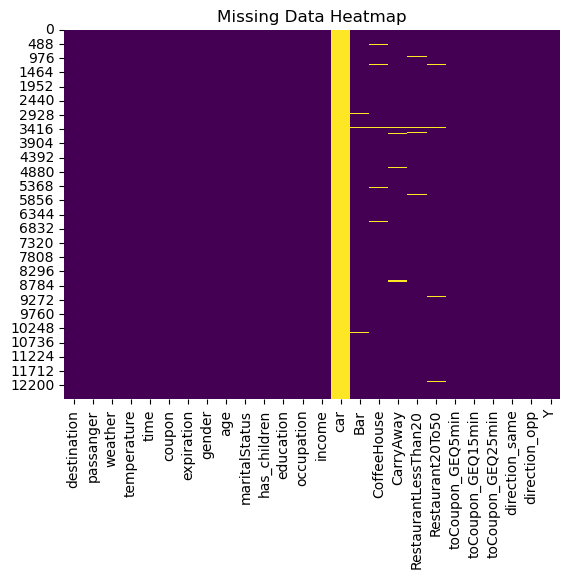

In [7]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data['CarryAway'] = data['CarryAway'].fillna('unknown')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [9]:
print(data.isnull().sum())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                   0
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [10]:
data.drop(columns=['car'])

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [11]:
acceptance_rate = data['Y'].mean()
print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 56.84%


In [12]:
# Calculate the counts of accepted (Y=1) and not accepted (Y=0) coupons
acceptance_counts = data['Y'].value_counts()

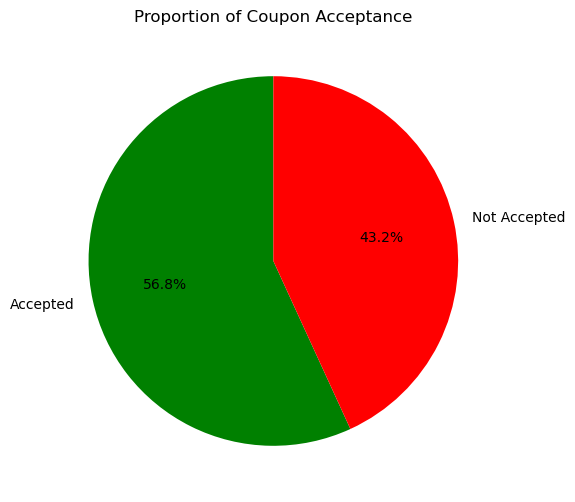

In [13]:
# Plot a pie chart to show thw acceptence
plt.figure(figsize=(8, 6))
plt.pie(
    acceptance_counts,
    labels=['Accepted', 'Not Accepted'],  
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['green', 'red']  
)
plt.title("Proportion of Coupon Acceptance")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

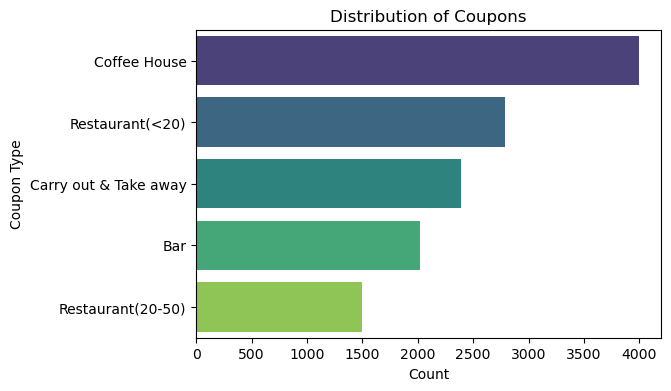

In [14]:
coupon_counts = data['coupon'].value_counts()
# Horizontal bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=coupon_counts.values, y=coupon_counts.index, hue=coupon_counts.index, dodge=False, palette="viridis", legend=False)
plt.title("Distribution of Coupons")
plt.xlabel("Count")
plt.ylabel("Coupon Type")
plt.show()

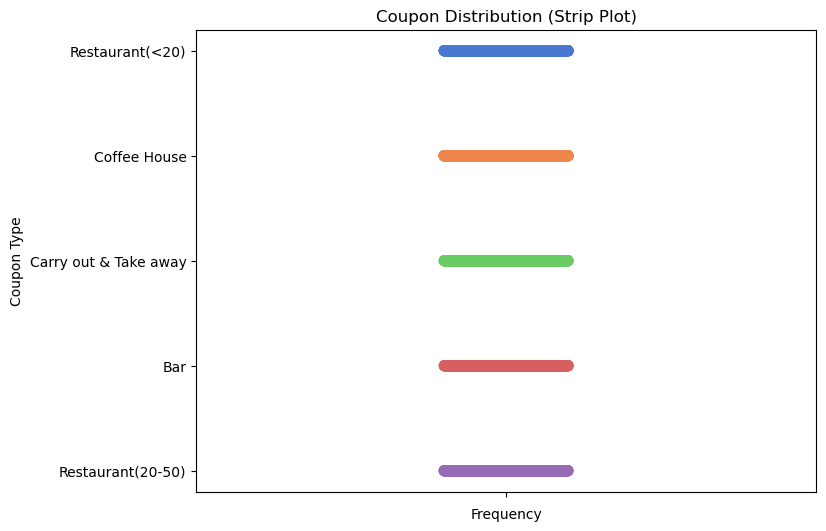

In [15]:

plt.figure(figsize=(8, 6))
sns.stripplot(data=data, y="coupon", size=8, hue="coupon", dodge=False, alpha=0.8, palette="muted", legend=False)

plt.title("Coupon Distribution (Strip Plot)")
plt.xlabel("Frequency")
plt.ylabel("Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

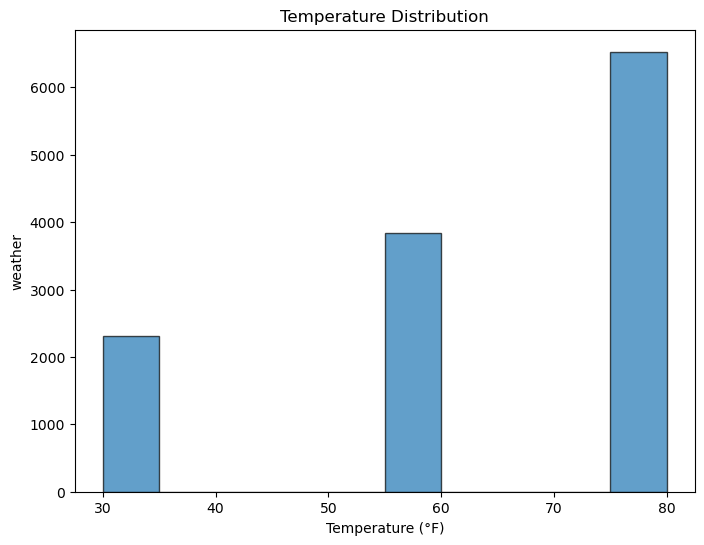

In [16]:


plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°F)")
plt.ylabel("weather")
plt.show()

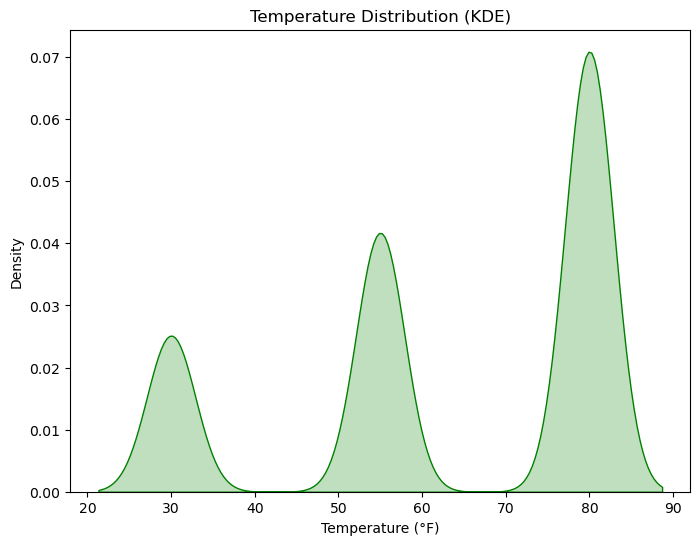

In [17]:
#using KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['temperature'], fill=True, color="green") 
plt.title("Temperature Distribution (KDE)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Density")
plt.show()

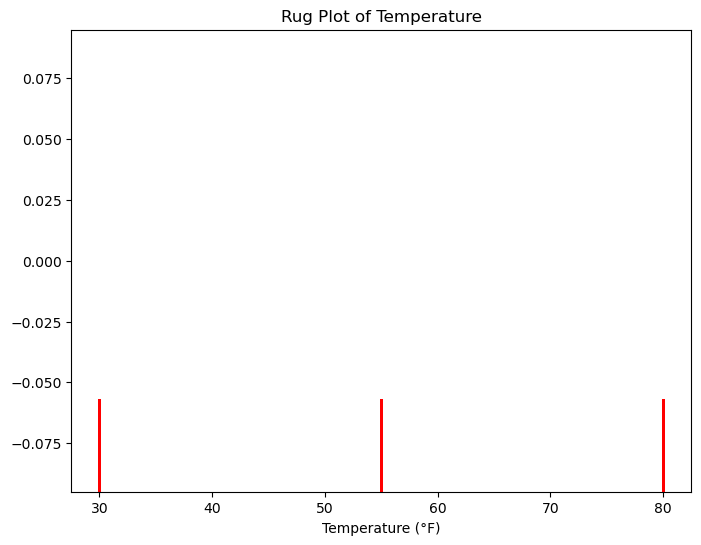

In [18]:
#using a rugplot
plt.figure(figsize=(8, 6))
sns.rugplot(data['temperature'], height=0.2, color="red")
plt.title("Rug Plot of Temperature")
plt.xlabel("Temperature (°F)")
plt.show()

In [19]:
print(data.columns) 

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar_data = data.loc[data['coupon'] == 'Bar']
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [21]:
data_bar=pd.DataFrame(bar_data)
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [22]:
accepted_bar = data_bar['Y'].mean()
print(f"Proportion of bar coupons accepted: {accepted_bar:.2%}")


Proportion of bar coupons accepted: 41.00%


In [23]:
data_bar['Bar_visits'] =data_bar['CoffeeHouse'].map({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
fewer = data_bar[data_bar['Bar_visits'] <= 3]['Y'].mean()
more = data_bar[data_bar['Bar_visits'] > 3]['Y'].mean()

print(f"Acceptance rate for <= 3 visits: {fewer:.2%}")
print(f"Acceptance rate for > 3 visits: {more:.2%}")


Acceptance rate for <= 3 visits: 39.72%
Acceptance rate for > 3 visits: 45.81%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Convert the 'age' column to numeric (integers) for proper comparison
data_bar['age'] = pd.to_numeric(data_bar['age'], errors='coerce')

# Filter for drivers who go to a bar more than once a month and are over 25
drivers1 = data_bar[(data_bar['Bar_visits'] > 1) & (data_bar['age'] > 25)]

# Filter for all other drivers
drivers2 = data_bar[~((data_bar['Bar_visits'] > 1) & (data_bar['age'] > 25))]

# Calculate acceptance rates for both groups
acceptance_rate1 = drivers1['Y'].mean()
acceptance_rate2 = drivers2['Y'].mean()

# Display the comparison
print(f"Acceptance rate for (frequent bar-goers), age > 25: {acceptance_rate1:.2%}")
print(f"Acceptance rate for (all others): {acceptance_rate2:.2%}")

Acceptance rate for (frequent bar-goers), age > 25: 47.90%
Acceptance rate for (all others): 38.44%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [26]:
drivers1 = data_bar[
    (data_bar['Bar_visits'] > 1) &
    (data_bar['passanger'] != "Kid(s)") &
    (data_bar['occupation'] != "Farming, Fishing, and Forestry")
]

In [27]:
drivers2 = data_bar[~(
    (data_bar['Bar_visits'] > 1) &
    (data_bar['passanger'] != "Kid(s)") &
    (data_bar['occupation'] != "Farming, Fishing, and Forestry")
)]

In [28]:
# Calculate acceptance rates for both drivers
acceptance_rate1 = drivers1['Y'].mean()
acceptance_rate2 = drivers2['Y'].mean()

In [29]:
# Display the comparison
print(f"Acceptance rate for (group), age > 25: {acceptance_rate1:.2%}")
print(f"Acceptance rate for (all others): {acceptance_rate2:.2%}")

Acceptance rate for (group), age > 25: 49.12%
Acceptance rate for (all others): 35.03%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [30]:
# Convert 'Bar' and 'RestaurantLessThan20' frequency columns to numeric
data_bar['Bar_visits'] = pd.to_numeric(
    data_bar['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9}),
    errors='coerce'
)
data_bar['Bar'] = data_bar['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9}).astype(float)
data_bar['RestaurantLessThan20'] = pd.to_numeric(data_bar['RestaurantLessThan20'], errors='coerce')

# Define conditions for each group
group1 = (data_bar['Bar_visits'] > 1) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['maritalStatus'] != 'Widowed')
group2 = (data_bar['Bar_visits'] > 1) & (data_bar['age'] < 30)
group3 = (data_bar['RestaurantLessThan20'] > 4)

# Combine groups
group_drivers = group1 | group2 | group3

# Filter data for combined group
filtered_data = data_bar[group_drivers]

# Calculate acceptance rates
acceptance_rate_combined = filtered_data['Y'].mean()
acceptance_rate_others = data_bar[~group_drivers]['Y'].mean()

# Display the comparison
print(f"Acceptance rate for combined group: {acceptance_rate_combined:.2%}")
print(f"Acceptance rate for others: {acceptance_rate_others:.2%}")

Acceptance rate for combined group: 71.43%
Acceptance rate for others: 29.31%


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_99865/3315839175.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bar['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9}),
/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_99865/3315839175.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bar['Bar'] = data_bar['Bar'].replace({'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9}).astype(float)


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
data['coupon'] = data['coupon'].str.strip().str.replace('–', '-', regex=False)

# Re-check unique values
print(data['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [32]:

restaurant_data = data[data['coupon'] == 'Restaurant(20-50)']

In [33]:
print(restaurant_data.shape) 

(1492, 26)


In [34]:
print(restaurant_data.head())

   destination passanger weather  temperature time             coupon  \
14        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   
18        Work     Alone   Sunny           80  7AM  Restaurant(20-50)   
36        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   
40        Work     Alone   Sunny           80  7AM  Restaurant(20-50)   
58        Home     Alone   Sunny           55  6PM  Restaurant(20-50)   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
14         1d  Female  21  Unmarried partner  ...        never   unknown   
18         1d  Female  21  Unmarried partner  ...        never   unknown   
36         1d    Male  21             Single  ...        less1       4~8   
40         1d    Male  21             Single  ...        less1       4~8   
58         1d    Male  46             Single  ...          4~8       1~3   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
14                  4~8  

In [35]:
print(data['coupon'].unique()) 

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [36]:
age_acceptance = restaurant_data.groupby('age')['Y'].mean()
print(age_acceptance)

age
21         0.439597
26         0.496552
31         0.417021
36         0.469880
41         0.455224
46         0.488095
50plus     0.355856
below21    0.412698
Name: Y, dtype: float64


In [37]:
marital_acceptance = restaurant_data.groupby('maritalStatus')['Y'].mean()
print(marital_acceptance)

maritalStatus
Divorced             0.354839
Married partner      0.417886
Single               0.462214
Unmarried partner    0.489083
Widowed              0.235294
Name: Y, dtype: float64


In [38]:
passanger_acceptance = restaurant_data.groupby('passanger')['Y'].mean()
print(passanger_acceptance)

passanger
Alone        0.422200
Friend(s)    0.464286
Kid(s)       0.373563
Partner      0.631206
Name: Y, dtype: float64


In [39]:
coffeehouse_acceptance = restaurant_data.groupby('CoffeeHouse')['Y'].mean()
carryaway_acceptance = restaurant_data.groupby('CarryAway')['Y'].mean()
restaurant_less20_acceptance = restaurant_data.groupby('RestaurantLessThan20')['Y'].mean()

print(coffeehouse_acceptance)
print(carryaway_acceptance)
print(restaurant_less20_acceptance)

CoffeeHouse
1~3      0.551351
4~8      0.407240
gt8      0.437500
less1    0.396465
never    0.414286
Name: Y, dtype: float64
CarryAway
1~3        0.460838
4~8        0.429474
gt8        0.467980
less1      0.387931
never      0.421053
unknown    0.571429
Name: Y, dtype: float64
RestaurantLessThan20
1~3      0.416796
4~8      0.468828
gt8      0.517007
less1    0.413127
never    0.333333
Name: Y, dtype: float64


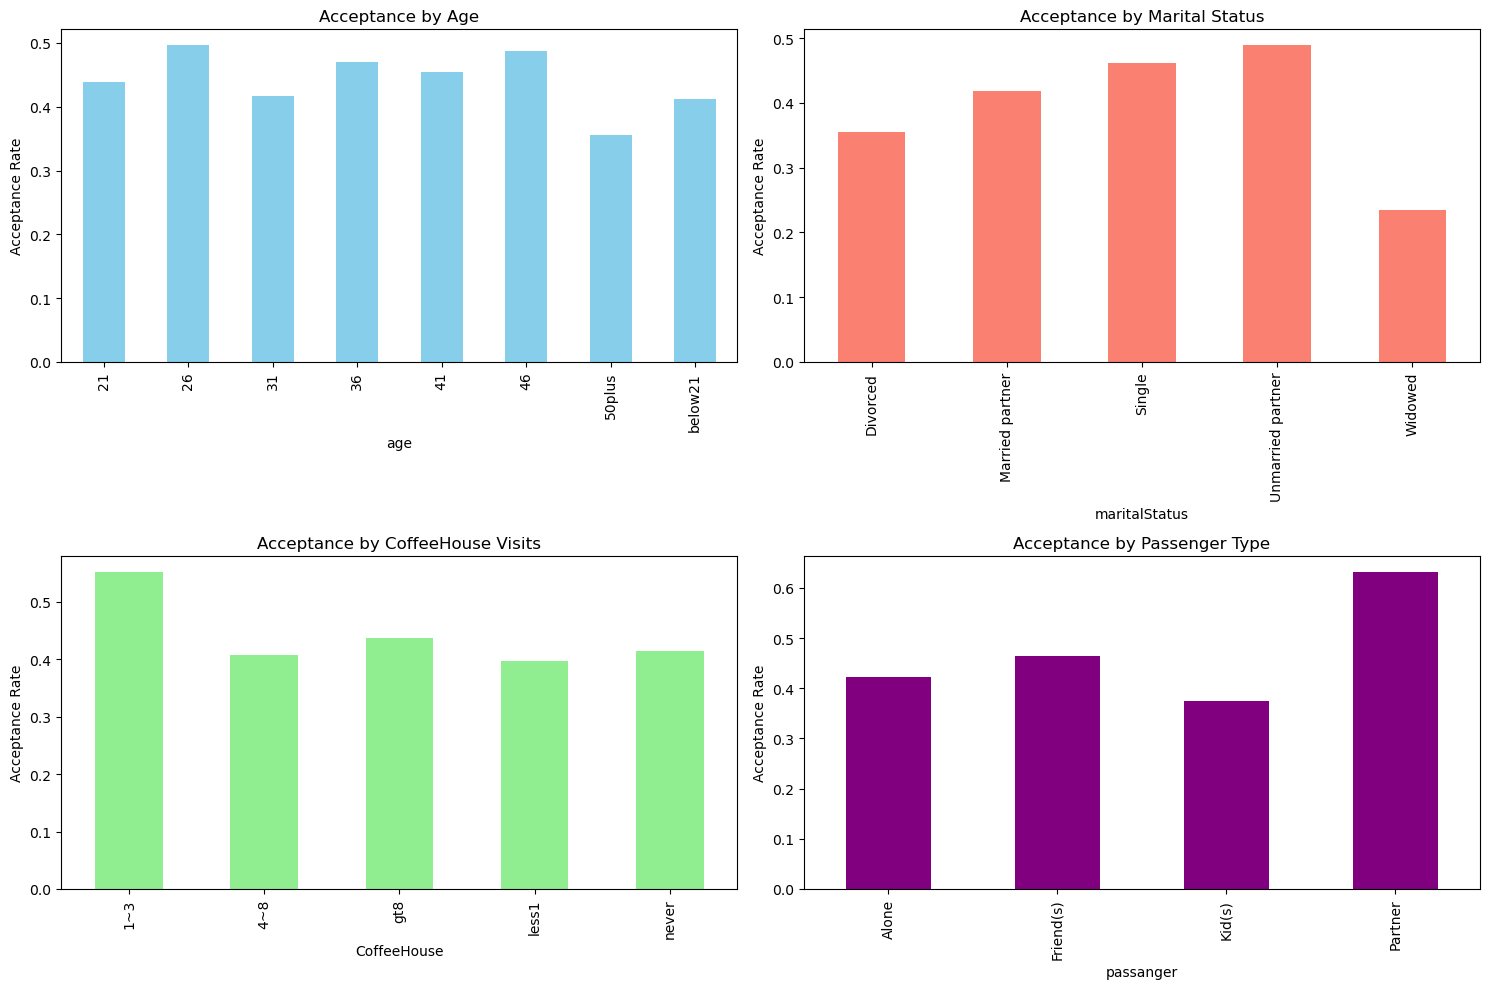

In [40]:
plt.figure(figsize=(15, 10))

# Age
plt.subplot(2, 2, 1)
age_acceptance.plot(kind='bar', color='skyblue', title='Acceptance by Age')
plt.ylabel('Acceptance Rate')

# Marital Status
plt.subplot(2, 2, 2)
marital_acceptance.plot(kind='bar', color='salmon', title='Acceptance by Marital Status')
plt.ylabel('Acceptance Rate')

# CoffeeHouse Visits
plt.subplot(2, 2, 3)
coffeehouse_acceptance.plot(kind='bar', color='lightgreen', title='Acceptance by CoffeeHouse Visits')
plt.ylabel('Acceptance Rate')

# Passenger Type
plt.subplot(2, 2, 4)
passanger_acceptance.plot(kind='bar', color='purple', title='Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')

plt.tight_layout()
plt.show()